In [16]:
library(dplyr)

In [1]:
setwd("D://LA//ATI Data//Summaries//Just_Auth")

In [13]:
df<- read.table(file="LA.txt", header=T, sep=",")
df<- df[,-1]

In [30]:
head(df)
dim(df)
str(df)

UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
User035855,Comp808475,Comp081330,TGS,0,17
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350
User762066,Comp306129,ActiveDirectory,TGS,0,22
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35
User043263,Comp883307,Comp384394,TGS,0,2
User631552,Comp621781,Comp915658,NetworkLogon,0,1


[1] 15953681        6

'data.frame':	15953681 obs. of  6 variables:
 $ UserName  : chr  "User035855" "Comp655251$" "User762066" "User384215" ...
 $ SrcDevice : chr  "Comp808475" "Comp655251" "Comp306129" "Comp095190" ...
 $ DstDevice : chr  "Comp081330" "ActiveDirectory" "ActiveDirectory" "EnterpriseAppServer" ...
 $ AuthType  : chr  "TGS" "NetworkLogon" "TGS" "NetworkLogon" ...
 $ Failure   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DailyCount: int  17 350 22 35 2 1 14 78 2 4 ...


In [17]:
df %>% mutate(across(where(is.factor), as.character)) -> df

In [23]:
UN <- read.table(file="UserNames.txt", header=F)
UN <- as.vector(UN[,1])

In [26]:
head(UN)
class(UN)
length(UN)

[1] "User024511" "User063197" "User203147" "User365588" "User409683"
[6] "User538831"

[1] "character"

[1] 99

In [27]:
Mal <- df[df$UserName%in%UN, ]

In [29]:
head(Mal)
dim(Mal)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
129,AppService,EnterpriseAppServer,Comp947445,TGS,0,2
468,User871458,Comp273168,Comp273168,TGS,0,6
584,User882755,Comp599337,ActiveDirectory,TGS,0,51
764,User718825,Comp544870,Comp370444,NetworkLogon,0,25
903,User538831,Comp277798,None,WorkstationLock,0,1
1018,AppService,Comp894088,Comp698972,NetworkLogon,0,110063


[1] 151819      6

[1] "There are 95 unique usernames."

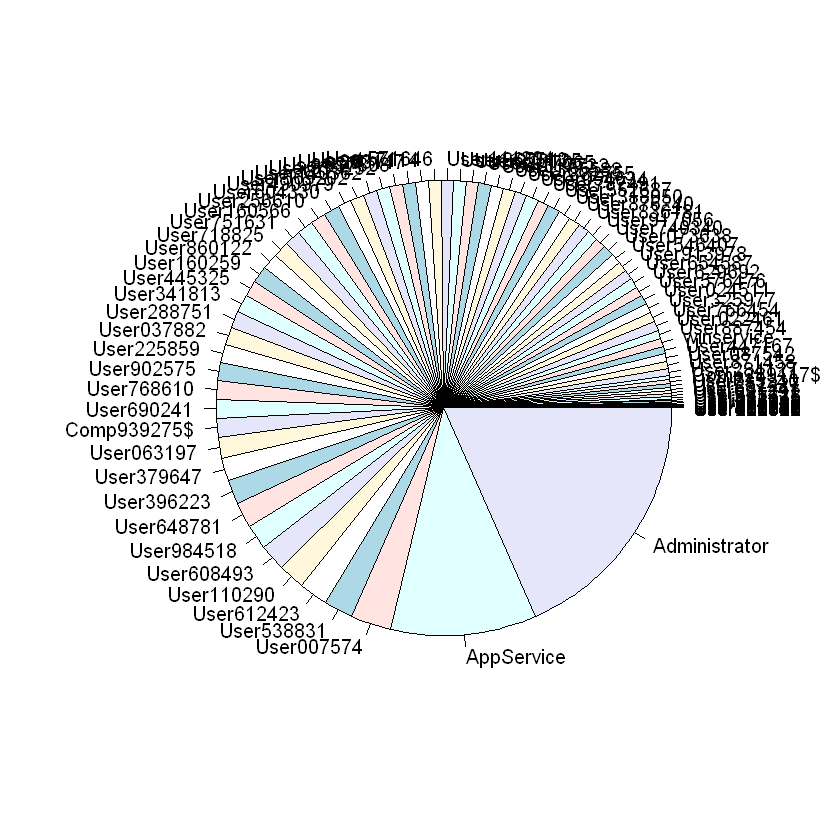

In [35]:
pie(table(Mal$UserName)[order(table(Mal$UserName), decreasing=F)])
paste0("There are ", length(unique(Mal$UserName)), " unique usernames.")

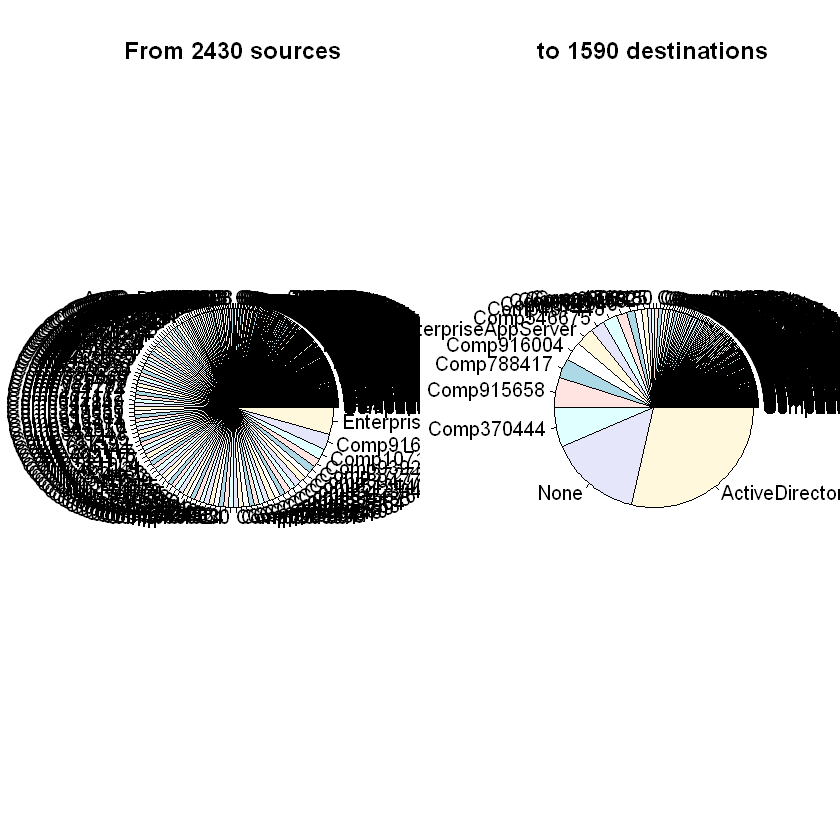

In [38]:
op <- par(mfrow=c(1,2))
pie(table(Mal$SrcDevice)[order(table(Mal$SrcDevice), decreasing=FALSE)], main=paste("From", length(unique(Mal$SrcDevice)), "sources", sep=" "))
pie(table(Mal$DstDevice)[order(table(Mal$DstDevice), decreasing=FALSE)], main=paste("to", length(unique(Mal$DstDevice)), "destinations", sep=" "))
par(op)

In [44]:
dim(Mal[Mal$SrcDevice=="None", ])

[1] "integer"

In [54]:
v<- c(3,3,5,7)

In [56]:
vf<- table(v)
vf

v
3 5 7 
2 1 1 

In [91]:
PartMean <- function(x=df$UserName) {
    
    n <- readline(prompt="Would you like to run the threshold algorithm T, or the automated version A? Input T or A: ")
    if(n=='T') {
        n<- readline(prompt="Input threshold. We recommend a value around 800, though 500 - 1000 is a sensible range:")
        n<- as.numeric(n)
        i<- 1
        t<- table(x)
        T<- length(t)/n
        len<- vector()
        med <- vector()
        while(length(t)>T) {
            len[i]<- length(t)
            m<- mean(t)
            med[i] <- m
            i<- 1+i
            t<- t[t>m]
            }

        len <- c(len, 0)
        med <- round(med)
        print("The partition lengths are:")
        print(len)
        print("The partitions have corresponding means:")
        print(med)
        print(t[order(t, decreasing=TRUE)])
    
        if(length(t)<=2 & length(t)>=1) {
            print("Potential outlier detected.")
            }
        }
    if(n=='A') { 
        t<- table(x)
        c<- 1
        while(length(t)>=2) {
        m<- mean(t)
        f<- t[t>m]
        f<- f[order(f, decreasing=FALSE)]
        t<- f
        print(paste0("Partition ", c))
        cat('\n')
        c<- 1+c
        if(length(f)>=7) {
            p<- paste(names(f[1]), names(f[2]), names(f[3]), names(f[4]), names(f[5]) , sep=" ")
            # print(p)
            print(paste(p, "and", (length(f)-5), "others", sep=" "))  
            cat("\n")      }
        if(length(f)<7)
          { print(f) 
              cat("\n")    }
            }
    
    
        }
    if(n!='A' & n!='T') {
        print("Unrecognized input.")
        stop()
        }
    }

In [92]:
PartMean()

Would you like to run the threshold algorithm T, or the automated version A? Input T or A: A
[1] "Partition 1"

[1] "Comp039053$ Comp044095$ Comp053112$ Comp076777$ Comp078004$ and 10373 others"

[1] "Partition 2"

[1] "User545165 User963380 Comp352050$ User141270 User142464 and 3738 others"

[1] "Partition 3"

[1] "User738085 User884998 User979892 User047514 User140862 and 755 others"

[1] "Partition 4"

[1] "User449100 User619750 User181140 User765669 User624654 and 64 others"

[1] "Partition 5"

x
   User272607    AppService Administrator       Scanner     Anonymous 
        15767         15791         27928        189928        472595 

[1] "Partition 6"

x
  Scanner Anonymous 
   189928    472595 

[1] "Partition 7"

Anonymous 
   472595 

